In [2]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
from scipy.stats import normaltest
scipy.__version__

'1.7.3'

In [3]:
df = pd.read_csv('insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q1: Do smokers have higher insurance charges than non-smokers?

Null Hypothesis: There is a difference in insurance rates between smokers and non-smokers
Alternative Hypothesis: There is no difference in insurance rates between smokers and non-smokers.

In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
df['smoke'] = df['smoker'].str.contains('yes')
df['smoke'].value_counts()

False    1064
True      274
Name: smoke, dtype: int64

In [6]:
needed_cols = ['smoke', 'charges']
df[needed_cols]

,smoke,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [7]:
non_smoker = df.loc[df['smoke']==False, needed_cols]
non_smoker

,smoke,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [8]:
smoker = df.loc[df['smoke']==True, needed_cols]
smoker

,smoke,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [9]:
plot_df =  pd.concat([smoker, non_smoker])
plot_df

,smoke,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


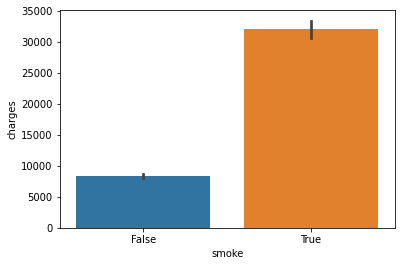

In [10]:
sns.barplot(data = plot_df, x = 'smoke', y = 'charges')

In [11]:
smoking_group = smoker['charges']
smoking_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [12]:
non_smoking_group = non_smoker['charges']
non_smoking_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [13]:
non_smoking_outliers = np.abs(stats.zscore(non_smoking_group))>3
smoking_outliers = np.abs(stats.zscore(smoking_group))>3

smoking_outliers.value_counts()

False    274
Name: charges, dtype: int64

In [14]:
non_smoking_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [15]:
non_smoking_group = non_smoking_group[~non_smoking_outliers]
non_smoking_group.value_counts().sum()

1040

In [16]:
result = stats.normaltest(smoking_group)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [17]:
len(smoking_group)

274

In [18]:
result1 = stats.normaltest(non_smoking_group)
result1

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [19]:
len(non_smoking_group)

1040

In [20]:
result2 = stats.levene(smoking_group, non_smoking_group)
result2.pvalue<.05

True

In [21]:
if result2.pvalue<.05:
    print("The group DO NOT have equal variance")
else:
    print("The group DO have equal variance")

The group DO NOT have equal variance


In [22]:
result = stats.ttest_ind(smoking_group, non_smoking_group, equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [23]:
print(result.pvalue<.000001)

True


In [24]:
smoking_group.mean()

32050.23183153284

In [25]:
non_smoking_group.mean()

7939.8608446721155

- We had a p-value <.05 for our welch's t-test. We reject the null hypothesis and support the alternative that there is a significant difference between smokers and non-smokers when it comes to insurance charges

Q2: Are men more likely to smoke than women?

In [26]:
df['gender'] = df['sex'].str.contains('female')
df['gender'].value_counts()

False    676
True     662
Name: gender, dtype: int64

In [27]:
needed_cols1 = ['smoker', 'gender']
df[needed_cols1]

,smoker,gender
0,yes,True
1,no,False
2,no,False
3,no,False
4,no,False
...,...,...
1333,no,False
1334,no,True
1335,no,True
1336,no,True


In [28]:
male_df = df.loc[df['gender']==False, needed_cols1]
male_df

,smoker,gender
1,no,False
2,no,False
3,no,False
4,no,False
8,no,False
...,...,...
1324,no,False
1325,no,False
1327,no,False
1329,no,False


In [29]:
female_df = df.loc[df['gender']==True, needed_cols1]
female_df

,smoker,gender
0,yes,True
5,no,True
6,no,True
7,no,True
9,no,True
...,...,...
1332,no,True
1334,no,True
1335,no,True
1336,no,True


In [30]:
plot_df1 =  pd.concat([male_df, female_df])
plot_df1

,smoker,gender
1,no,False
2,no,False
3,no,False
4,no,False
8,no,False
...,...,...
1332,no,True
1334,no,True
1335,no,True
1336,no,True


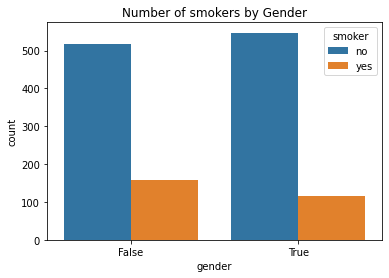

In [31]:
ax = sns.countplot(data=plot_df1, x='gender',hue='smoker',)
ax.set_title("Number of smokers by Gender");

In [32]:
male_group = male_df['smoker']
female_group = female_df['smoker']
female_group

0       yes
5        no
6        no
7        no
9        no
       ... 
1332     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 662, dtype: object

In [33]:
male_group.value_counts()

no     517
yes    159
Name: smoker, dtype: int64

In [34]:
female_group.value_counts()

no     547
yes    115
Name: smoker, dtype: int64

In [35]:
table = pd.crosstab(plot_df1['smoker'], plot_df1['gender'])
table

gender,False,True
smoker,,
no,517,547
yes,159,115


In [36]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result
print(p)
p<.05

0.006548143503580696


True

In [37]:
len(female_group)

662

In [38]:
len(male_group)

676

In [39]:
if p <.05:
    print("The group DO NOT have equal variance")
else:
    print("The group DO have equal variance")

The group DO NOT have equal variance


Since the p-value is less than .05, we reject the null hypothesis and find that there is significant relationship between smokers and gender. 

 Q3. Do different regions have different charges, on average?

Null: Different regions DO NOT have different charges on average.
Alternative: Different regions DO have different charges on averages

In [40]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   smoke     1338 non-null   bool   
 8   gender    1338 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(3)
memory usage: 75.9+ KB


,age,sex,bmi,children,smoker,region,charges,smoke,gender
0,19,female,27.900,0,yes,southwest,16884.92400,True,True
1,18,male,33.770,1,no,southeast,1725.55230,False,False
2,28,male,33.000,3,no,southeast,4449.46200,False,False
3,33,male,22.705,0,no,northwest,21984.47061,False,False
4,32,male,28.880,0,no,northwest,3866.85520,False,False


In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoke,gender
0,19,female,27.900,0,yes,southwest,16884.92400,True,True
1,18,male,33.770,1,no,southeast,1725.55230,False,False
2,28,male,33.000,3,no,southeast,4449.46200,False,False
3,33,male,22.705,0,no,northwest,21984.47061,False,False
4,32,male,28.880,0,no,northwest,3866.85520,False,False


In [42]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

[Text(0, 0, 'southwest'),
 Text(0, 0, 'southeast'),
 Text(0, 0, 'northwest'),
 Text(0, 0, 'northeast')]

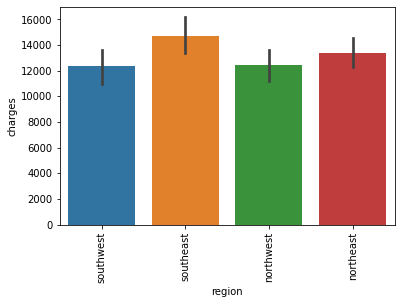

In [43]:
ax = sns.barplot(data = df, x = 'region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [44]:
groups = {}

for region in df['region'].unique():
   price =  df.loc[df['region'] == region, 'charges']
   groups[region] = price

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [45]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [46]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [47]:
result = stats.levene(*groups.values())
result

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [48]:
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


In [49]:
result1 = stats.kruskal(*groups.values())

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

In [50]:
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [52]:
print(result1.pvalue<.000001)

True


We had a p-value <.05 for our kruskal test. We reject the null hypothesis and support the alternative that there is a significant difference between regions when it comes to insurance charges